# Ch02. Supervised Learning

- Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. 
- Goal is to make accurate predictions for new, never-before-seen data.
- Build a model that is able to generalize as accurately as possible

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn
%matplotlib inline

In [4]:
# load the dataset for two-class classification
X, y = mglearn.datasets.make_forge()

X.shape is (26, 2)


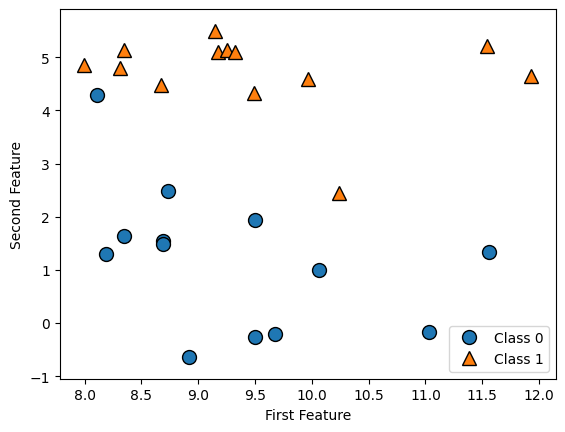

In [6]:
# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f"X.shape is {X.shape}")

Text(0, 0.5, 'Target')

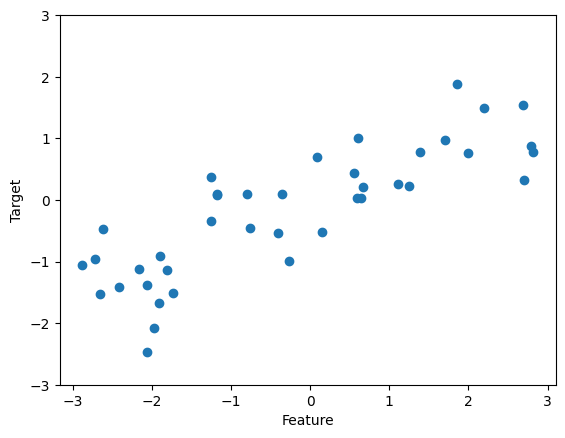

In [10]:
# load the dataset for regression
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [23]:
# Real-world classification data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n {cancer.keys()}")

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
# check the shape of this dataset
print(f"shape of cancer data: {cancer['data'].shape}")

shape of cancer data: (569, 30)


In [20]:
# count the numbe of targets
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

In [22]:
# feature names
print(f"The feature names are: \n{cancer['feature_names']}")

The feature names are: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
# Real-world Regression Data
from sklearn.datasets import load_boston
boston = load_boston()
print(f"the shape of boston data is {boston['data'].shape}")

the shape of boston data is (506, 13)


In [31]:
# load more feature about boston data
X, y = mglearn.datasets.load_extended_boston()
print(f"the sahep of X is {X.shape}")

the sahep of X is (506, 104)


/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

## k-Nearest Neighbors

- To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”
- In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.
- When considering more than one neighbor, we use voting to assign a label. 
- This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent.

### Notes

When the number of nearest neighbors (k) is set to an even number in k-NN, there is a possibility of having a tie when determining the class label of a new data point.

In the case of a tie, there are several common approaches to resolve it:

- Majority voting: If there is a tie between two or more classes, the class label that has the majority among the tied neighbors is chosen as the predicted class.
- Distance weighting: Instead of relying solely on the counts of neighbors, the distances of the tied neighbors can be taken into account. The class label of the new data point is assigned based on a weighted voting scheme, where closer neighbors have a higher weight in the decision.
- Random selection: When there is a tie, the class label can be randomly selected from the tied classes.

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


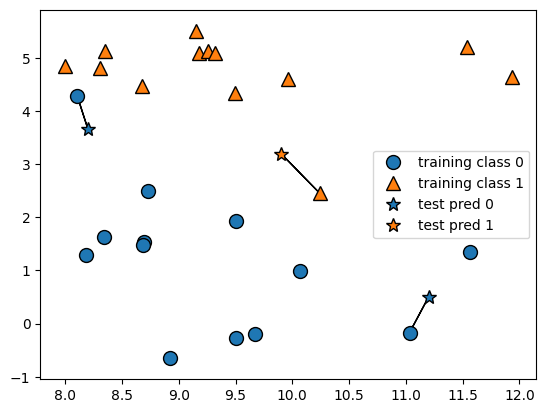

In [32]:
# k-nn when k=1
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


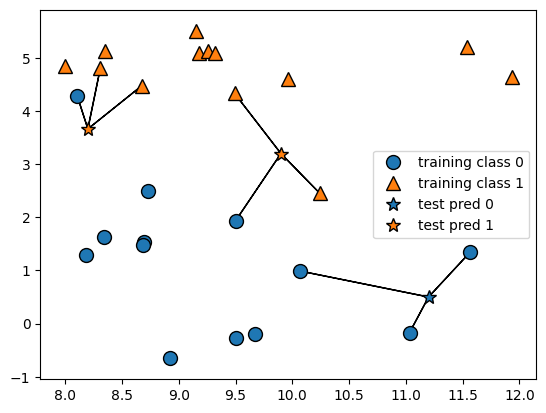

In [35]:
# k-nn when k=3
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [36]:
# K-nn model
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [39]:
# k-nn estimator with k=3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [40]:
# fit the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# call predict method
clf.predict(X_test)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 1, 0, 0])

In [43]:
# call score method to chec kthe accuracy
clf.score(X_test, y_test)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8571428571428571

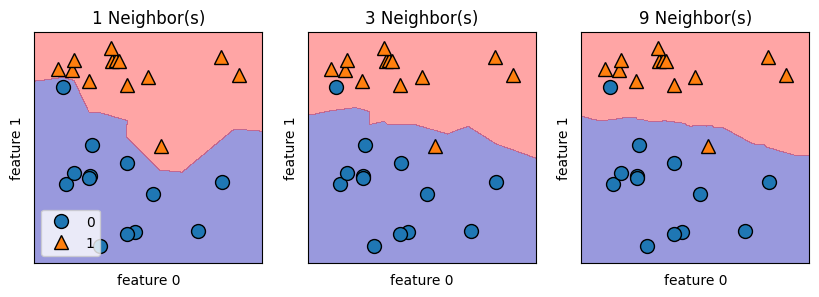

In [45]:
# visualizations of the decision boundaries
# divide between where the algorithm assigns class 0 versus where it assigns class 1
# more neighbors leads to a smoother decision boundary
# A smoother boundary corresponds to a simpler model
# using few neighbors corresponds to high model complexity
# using many neighbors corresponds to low model complexity

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} Neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [47]:
# Using real-world data to confirm the connection between model complexity and generalization
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=66)

In [51]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)

In [52]:
for n_neighbors in neighbors_setting:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fit the data to finish building the model
    clf.fit(X_train, y_train)
    # record the accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

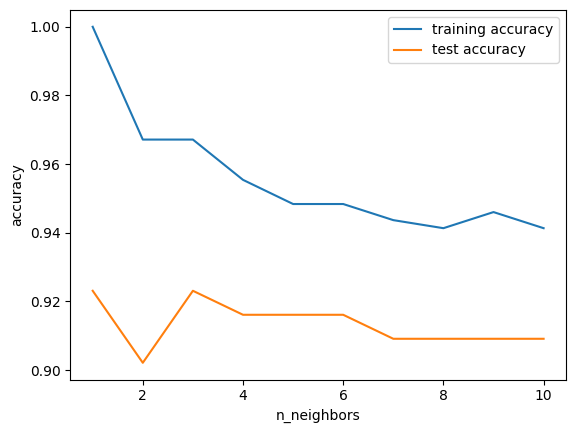

In [54]:
# The best performance is somewhere in the middle,
using around six neighbors
plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

### k-neighbors regression

- Choosing the number of neighbors (k): The 'k' represents the number of nearest neighbors that the algorithm considers. Selecting an appropriate k value is critical.
- Calculating the distance: For a new unlabeled data point, the algorithm calculates its distance from each training data point.
- Finding the k-nearest neighbors: The algorithm identifies the k training data points that are closest to the new data point.
- Computing the average: Unlike k-NN classification, k-NN regression assigns the average of the target values of these k neighbors to the new data point. This means the prediction is the mean of the nearest neighbors' values.

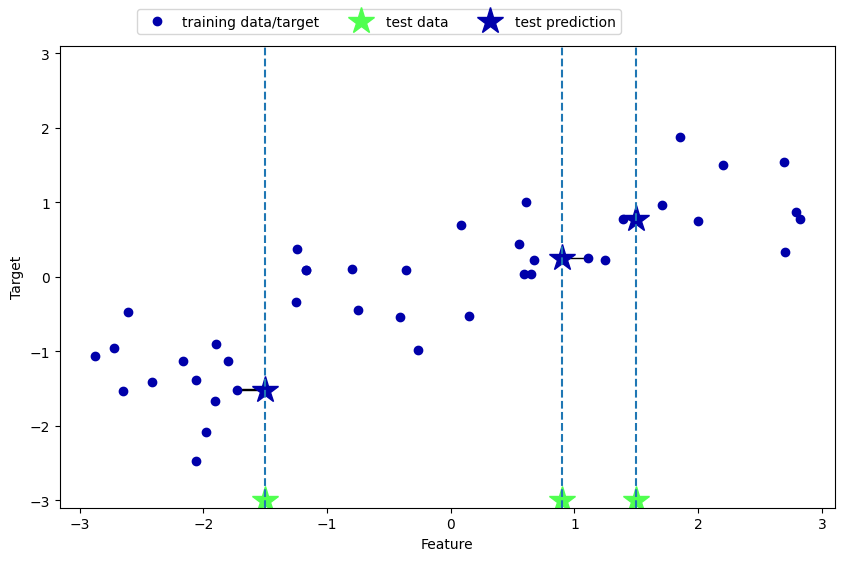

In [56]:
# plot of k-nn regression
# we have test_data on x-axis, draw a vertical line, 
# find the point where the distance is closest to the existing point
# that is the test prediction
mglearn.plots.plot_knn_regression(n_neighbors=1)

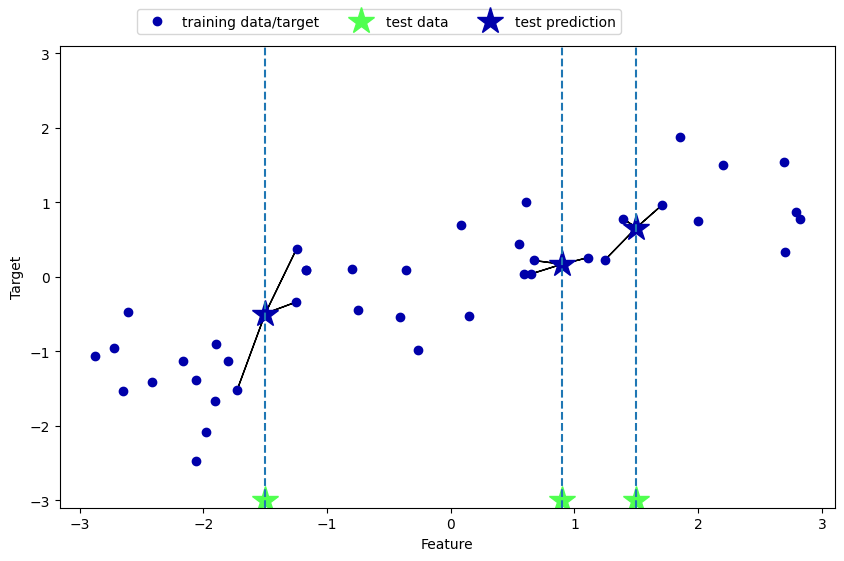

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
# sklearn
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and set n_neighbors=3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
# predict
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [67]:
# re.score return r-squared
reg.score(X_test, y_test)

0.8344172446249605

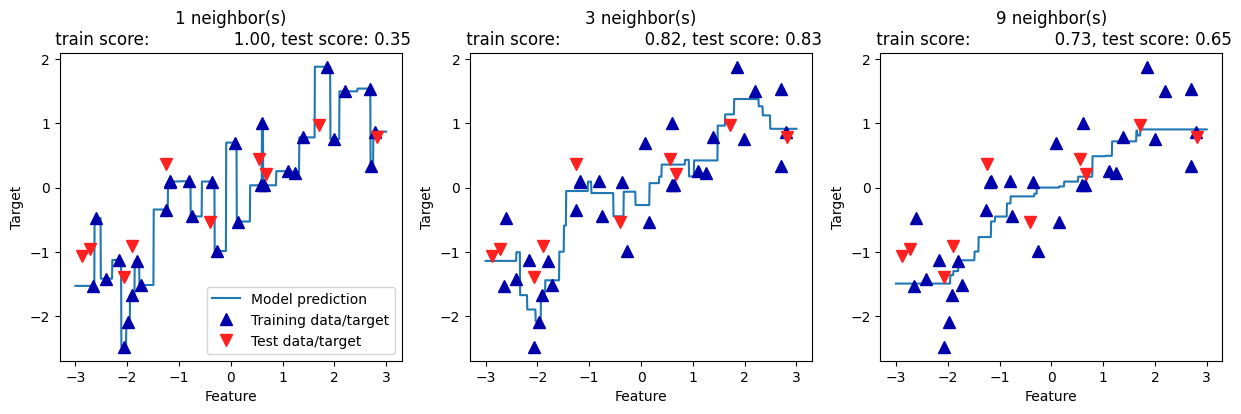

In [79]:
# test with different n_neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 points evenly spaced bt -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbor, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbor)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbor} neighbor(s)\n train score:\
                {reg.score(X_train, y_train):.2f}, test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")

### Conclusion

- Using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. 
- More neighbors leads to smoother predictions, but these do not fit the training data as well.
- The nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.

## Linear Model

-  Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. 
- The mean squared error is the sum of the squared differences between the predictions and the true values. 
- Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity
- The parameters are like the n_neighbors in K-NN


w[0]: 0.393906  b: -0.031804


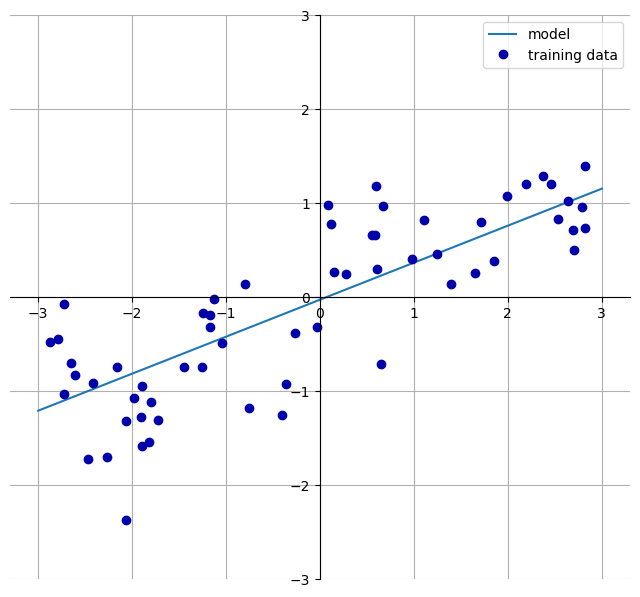

In [3]:
# the slope w is around 0.4, the intercept b is -0.03
mglearn.plots.plot_linear_regression_wave()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
lr = LinearRegression().fit(X_train, y_train)

In [16]:
# lr.coef_ attribute is the weight coefficient
print(f"lr.coef_: {lr.coef_}")

lr.coef_: [0.39390555]


In [14]:
# lr.intercept_ is the intercept
print(f"lr.intercept_: {lr.intercept_:.3f}")

lr.intercept_: -0.032


In [21]:
# model score: r-squared
# An R2 of around 0.66 is not very good, 
# the scores on the training and test sets are very close together. 
# This means we are likely underfitting
print(f"Train score: {lr.score(X_train, y_train)}")
print(f"Test score: {lr.score(X_test, y_test)}")

Train score: 0.6700890315075756
Test score: 0.65933685968637


In [26]:
# use another dataset
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [33]:
# This discrepancy between performance on the training set and the test set is a clear sign of overfitting
# overfitting in reuslts is due to complex model
print(f"Train test score: {lr.score(X_train, y_train)}")
print(f"Test test score: {lr.score(X_test, y_test)}")

Train test score: 0.9520519609032729
Test test score: 0.6074721959666121


### Notes

- If there is a large discrepancy of R-Squared between training and test set, we should find another model that allows us to control cmplexity
- Alternative: riage regression

## Ridge Regression

- In ridge regression, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint
- the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero
-  this means each feature should have as little effect on the outcome as possible
-  This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting
- It is a method used to alleviate the problem of multicollinearity (high correlation among predictor variables) in linear regression.

In [32]:
# ridge regresion
# Ridge is a more restricted model, so we are less likely to overfit.
# A less complex model means worse performance on the training set, but better generalization
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

print(f"ridge train score: {ridge.score(X_train, y_train)}")
print(f"ridge test score: {ridge.score(X_test, y_test)}")

ridge train score: 0.885796658517094
ridge test score: 0.7527683481744757


### Alpha in Ridge Regression

- The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set
- Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization
- Increasing alpha corresponds to increasing regularization
- Larger alpha: increases the amount of regularization and shrinks the coefficients towards zero, making the model simpler and less likely to overfit the data. 
- However, if alpha is too large, the model may become too simple and underfit the data. 
- Choosing an appropriate value for alpha is essential and is usually done through cross-validation.
- Setting alpha = 0 eliminates the regularization term, turning the Ridge loss function into the OLS loss function

In [35]:
# default aplha is 10
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
print(f"Training Score with alpha 1.0: {ridge10.score(X_train, y_train)}")
print(f"Test Score with alpha 1.0: {ridge10.score(X_test, y_test)}")

Training Score with alpha 1.0: 0.7882787115369616
Test Score with alpha 1.0: 0.6359411489177311


In [37]:
# alpha=0.1, meaning less constrains on cofficients
# the results are similar to LinearRegression
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)
print(f"Training Score with alpha 1.0: {ridge01.score(X_train, y_train)}")
print(f"Test Score with alpha 1.0: {ridge01.score(X_test, y_test)}")

Training Score with alpha 1.0: 0.9282273685001988
Test Score with alpha 1.0: 0.7722067936480149


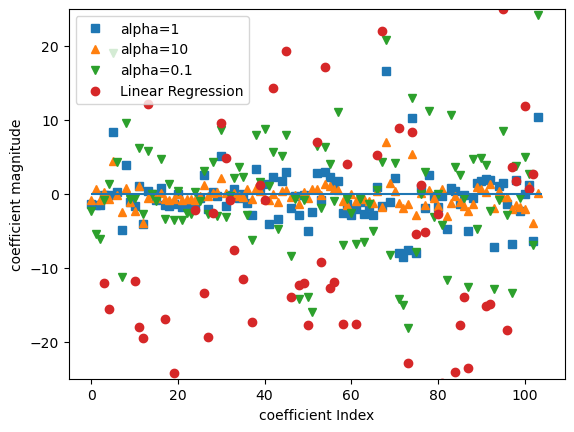

In [48]:
# plot the coefficients for different alpha
# Note: there are over 104 independent variables in X_train
plt.plot(ridge.coef_, 's', label="alpha=1")
plt.plot(ridge10.coef_, '^', label="alpha=10")
plt.plot(ridge01.coef_, 'v', label="alpha=0.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("coefficient Index")
plt.ylabel("coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [49]:
# there are 104 columns in X_train
X_train.shape

(379, 104)

C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

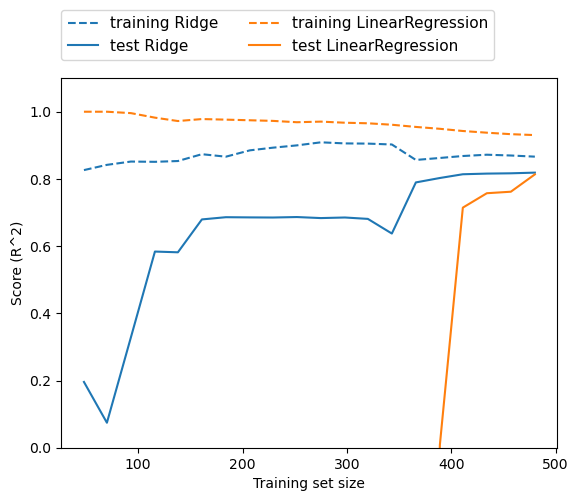

In [50]:
mglearn.plots.plot_ridge_n_samples()

### Notes

- With fixed alpha, the influence of regularization is affected by the sample size
- The training score is higher than the test score for all dataset sizes, for both ridge and linear regression.
- The figure shows the score of ridge training is always lower than LR training
- The socre of ridge test is better than LR test 
- As sample size increases, the score of LR test reaches to the level of ridge test
- with enough training data, regularization becomes less important, 
- with given enough data, ridge and linear regression will have the same performance
- If more data is added, it becomes harder for a model to overfit, or memorize the data

## Lasso

- Lasso is an alternative to Ridge, which is called `L1 regularization`

### L1 and L2 regularization

- L1 and L2 regularization are techniques used to prevent overfitting in machine learning models by adding a penalty to the loss function (cost function). 
- This penalty discourages the model from assigning too much importance to any one feature, thus making the model more generalizable to unseen data.

#### L1

- Also called as Lasso (Least Absolute Shrinkage and Selection Operator) regularization. 
- The penalty is calculated as the absolute value of the magnitude of the coefficients. 
- This means that it's the sum of the absolute values of the coefficients.
- L1 regularization has a property where it can shrink some of the model coefficients to zero. 
- This can serve as a method for `feature selection`, as it essentially removes the features that it deems unimportant from the model.
- The L1 regularization term is represented as: `L1 Penalty = alpha * sum(|coefficients|)`
- The L1 penalty is then added to the ordinary least squares (OLS) loss function to create the Lasso loss function: `Lasso Loss function = Sum of squared residuals + alpha * (sum of absolute values of coefficients)`


#### L2

- Also called as Ridge Regression
- L2 regularization doesn't shrink coefficients to zero and therefore doesn't do feature selection
- it aims to shrink the coefficients to be as small as possible, which is useful in situations where we have highly correlated features.
- The L2 regularization term is represented as: `L2 Penalty = alpha * sum(coefficients^2)`
- L2 penalty is added to the ordinary least squares (OLS) loss function: `Ridge Loss function = Sum of squared residuals + alpha * (sum of squared coefficients)`

In [56]:
# L1 Lasso: feature selection
# with alpha=1.0 default value, the model is underfitting as the r-squared is 0.29
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

print(f"Lasso Train Score: {lasso.score(X_train, y_train)}")
print(f"Lasso Test Score: {lasso.score(X_test, y_test)}")

print(f"Number of features used: {(lasso.coef_ != 0).sum()}")

Lasso Train Score: 0.29323768991114607
Lasso Test Score: 0.20937503255272316
Number of features used: 4


In [59]:
# try to decrease alpha and increase max_iter (max number of iterations to run)
# A lower alpha allows us to fit a more complex model
lasso001 = Lasso(alpha=0.01, max_iter=100000)
lasso001.fit(X_train, y_train)

print(f"Lasso Train Score: {lasso001.score(X_train, y_train)}")
print(f"Lasso Test Score: {lasso001.score(X_test, y_test)}")

print(f"Number of features used: {(lasso001.coef_ != 0).sum()}")

Lasso Train Score: 0.8962226511086498
Lasso Test Score: 0.7656571174549984
Number of features used: 33


In [60]:
# if alpha is too low, it is overfitting
lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(X_train, y_train)

print(f"Lasso Train Score: {lasso00001.score(X_train, y_train)}")
print(f"Lasso Test Score: {lasso00001.score(X_test, y_test)}")

print(f"Number of features used: {(lasso00001.coef_ != 0).sum()}")

Lasso Train Score: 0.9507158754515459
Lasso Test Score: 0.6437467421273819
Number of features used: 96


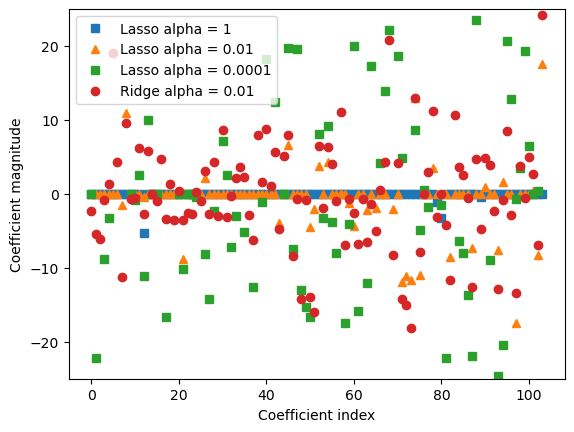

In [67]:
# plot the different alpha in Lasso
plt.plot(lasso.coef_, 's', label="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.01")
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc='best')

### Conclusion

- In practice, ridge regression is usually the first choice between these two models.
- scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge
-  In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

## Linear Models for Classification

- The prediction formula is: `ŷ = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b > 0`
- There is threshold the predicted value at zero
- If the function is smaller than zero, we predict the class –1; 
- If it is larger than zero, we predict the class +1

### Logistic Regression and Linear Support Vector Machines
- The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). 
- LogisticRegression is a classification algorithm and not a regression algorithm

C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


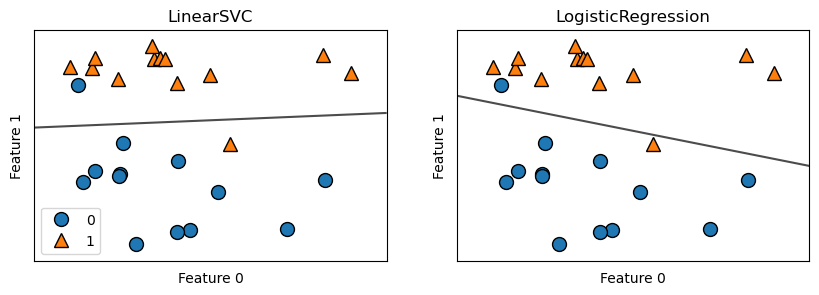

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

### Notes

- For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called `C`
- Higher values of C correspond to `less` regularization (opposite with alpha, increasing alpha increases regulazation)
- when using a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible (overfitting, building a more complex model)
- LogisticRegression applies an L2 regularization by default, meaning stronger regularization pushes coefficients more and more toward zero, though coefficients never become exactly zero

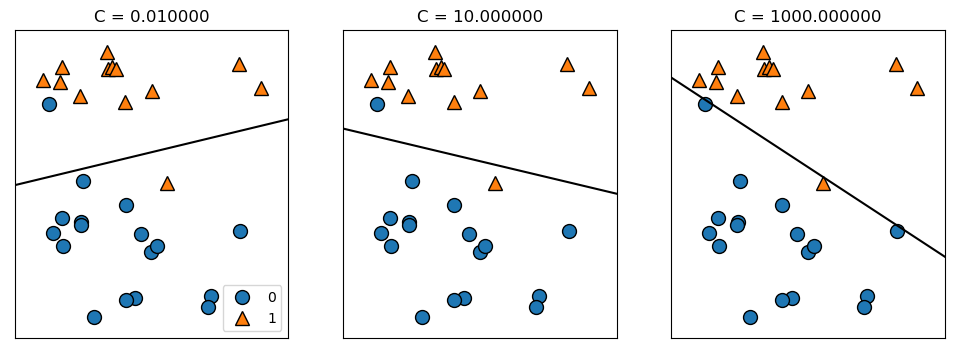

In [74]:
# with a high C, the model fit more for training data
mglearn.plots.plot_linear_svc_regularization()

In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],\
                                                    stratify=cancer['target'], random_state=42)

In [78]:
logreg = LogisticRegression().fit(X_train, y_train)

# score for Logistic Regression is the accuracy rate
print(f"Logreg Train Score: {logreg.score(X_train, y_train)}")
print(f"Logreg Test Score: {logreg.score(X_test, y_test)}")

Logreg Train Score: 0.9460093896713615
Logreg Test Score: 0.965034965034965


C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# increase C to make the model less complex and less regulazation
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print(f"Logreg100 Train Score: {logreg100.score(X_train, y_train)}")
print(f"Logreg100 Test Score: {logreg100.score(X_test, y_test)}")

Logreg100 Train Score: 0.9577464788732394
Logreg100 Test Score: 0.958041958041958


C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# set C=0.01 so that it is more regulazation
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print(f"Logreg001 Train Score: {logreg001.score(X_train, y_train)}")
print(f"Logreg001 Test Score: {logreg001.score(X_test, y_test)}")

Logreg001 Train Score: 0.9342723004694836
Logreg001 Test Score: 0.9300699300699301


C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


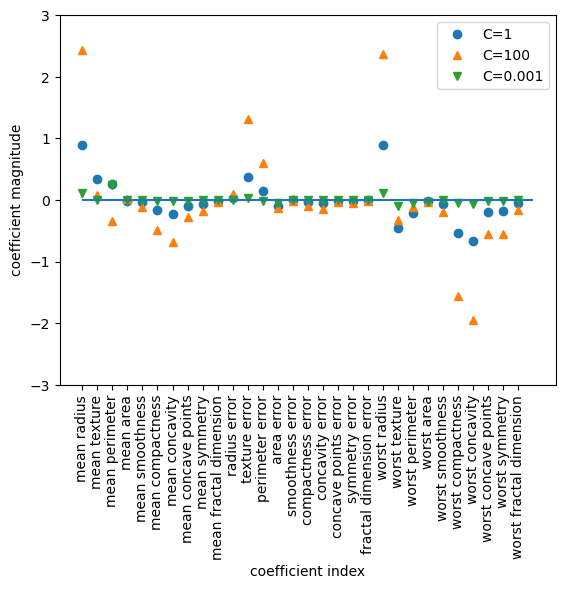

In [96]:
# plot the coeffieicents under different Cs
# 
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
plt.hlines(0, 0, cancer['data'].shape[1])

plt.ylim(-3, 3)

plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')

plt.legend()

Training accuarcy of L1 logreg with C: 0.001 is 0.913
Test accuarcy of L1 logreg with C: 0.001 is 0.923
Training accuarcy of L1 logreg with C: 1 is 0.960
Test accuarcy of L1 logreg with C: 1 is 0.958
Training accuarcy of L1 logreg with C: 100 is 0.986
Test accuarcy of L1 logreg with C: 100 is 0.979


C:\Users\s149975\Miniconda3\envs\homl3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


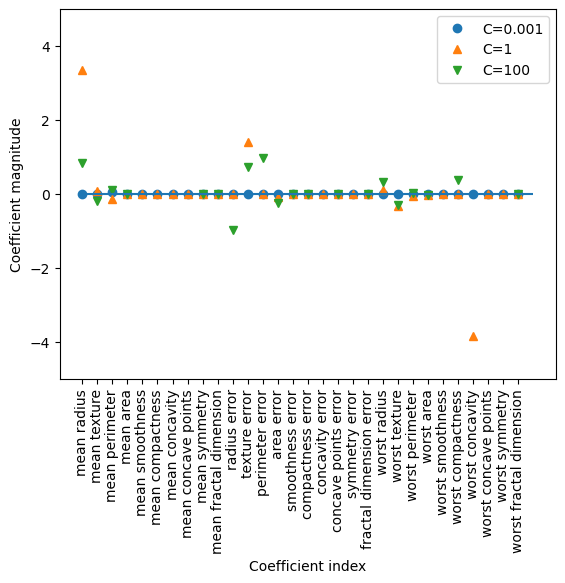

In [106]:
# use L1 regularization for more interpretable model
# add parameter of penalty='l1' and solver='liblinear'
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print(f"Training accuarcy of L1 logreg with C: {C} is {lr_l1.score(X_train, y_train):.3f}")
    print(f"Test accuarcy of L1 logreg with C: {C} is {lr_l1.score(X_test, y_test):.3f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C}")

plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
plt.hlines(0, 0, cancer['data'].shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend()

### Linear models for multiclass classification

- Many linear classification models are for binary classification only
- A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach
-  In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes

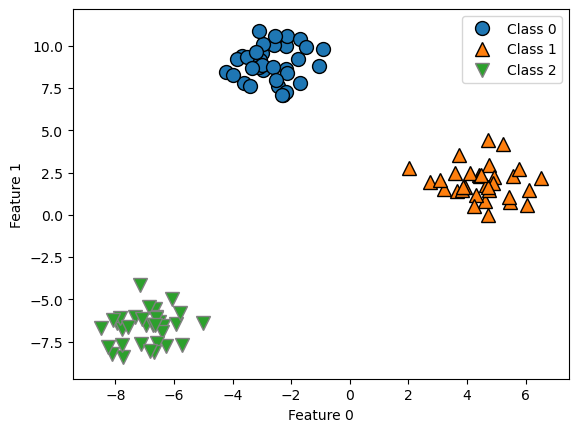

In [116]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

# there are two features in X
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [113]:
# train LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X, y)

# each row of coef_ contains the coefficient vector for one of the three classes and 
# each column holds the coefficient value for a specific feature
print(f"Coefficient shape: {linear_svm.coef_.shape}")

# intercept_ is a 1D array containing the intercept for each class
print(f"Intercept shape: {linear_svm.intercept_.shape}")

Coefficient shape: (3, 2)
Intercept shape: (3,)


In [114]:
linear_svm.coef_

array([[-0.17491905,  0.23140264],
       [ 0.47621596, -0.06936542],
       [-0.18914108, -0.20400474]])

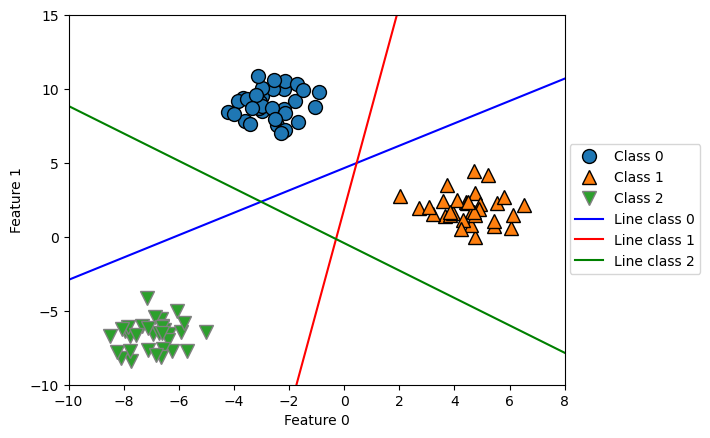

In [121]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

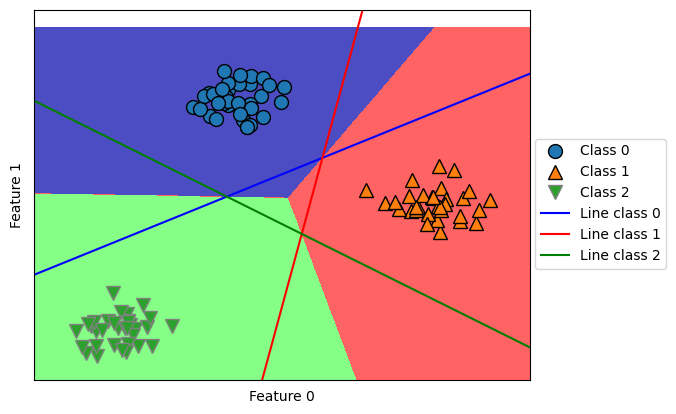

In [122]:
# predictions for all regions of the 2D space

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))